In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import textwrap
from pathlib import Path

results_output_path = Path('../results/data_intro/')
results_output_path.joinpath('figures').mkdir(parents=True, exist_ok=True)

Data Descriptions with explanations of columns
* **[U.S. DOT T-100 International Market Data](https://www.opendatanetwork.com/dataset/datahub.transportation.gov/xgub-n9bw)**: The primary source for monthly passenger counts on international routes to/from the United States. Accessed via the Socrata Open Data API.
* **[OurAirports Data](https://davidmegginson.github.io/ourairports-data/)**: A comprehensive database of global airports, used to enrich the flight data with geographic details like country codes, continents, and GPS coordinates.
* **[World Bank Open Data](https://data.worldbank.org/)**: Provides country-level, year-appropriate economic and demographic indicators, such as GDP and population. Accessed via the `wbgapi` Python package.

In [2]:
parquet_path = "../data/T100_International/final_enriched_data.parquet"
df = pd.read_parquet(parquet_path)
print('Number of rows:', df.shape[0])
print('Number of columns:', df.shape[1])
df

Number of rows: 808332
Number of columns: 48


,data_dte,year,month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,...,fg_gdp,fg_gdp_per_capita,fg_population,fg_tourism_arrivals,fg_trade_pct_gdp,usg_gdp,usg_gdp_per_capita,usg_population,usg_tourism_arrivals,usg_trade_pct_gdp
0,1990-12-01,1990,12,11697,FLL,33,16217,YUL,941,19531,...,5.960756e+11,21525.861139,27691138.0,41657000.0,42.087447,5.963144e+12,23888.600009,249623000.0,79732000.0,15.270116
1,1990-12-01,1990,12,13204,MCO,33,16271,YYZ,936,19523,...,5.960756e+11,21525.861139,27691138.0,41657000.0,42.087447,5.963144e+12,23888.600009,249623000.0,79732000.0,15.270116
2,1990-12-01,1990,12,14112,PIE,33,16271,YYZ,936,20116,...,5.960756e+11,21525.861139,27691138.0,41657000.0,42.087447,5.963144e+12,23888.600009,249623000.0,79732000.0,15.270116
3,1990-12-01,1990,12,11697,FLL,33,16271,YYZ,936,19531,...,5.960756e+11,21525.861139,27691138.0,41657000.0,42.087447,5.963144e+12,23888.600009,249623000.0,79732000.0,15.270116
4,1990-12-01,1990,12,11618,EWR,21,13605,NAS,204,19704,...,3.166000e+09,11473.300839,275945.0,3239000.0,42.640556,5.963144e+12,23888.600009,249623000.0,79732000.0,15.270116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808327,2024-09-01,2024,9,12478,JFK,22,12972,LHR,493,19540,...,3.643834e+12,52636.786594,69226000.0,11101000.0,36.467439,2.918489e+13,85809.900385,340110988.0,45037000.0,18.586669
808328,2024-07-01,2024,7,12478,JFK,22,12972,LHR,493,19540,...,3.643834e+12,52636.786594,69226000.0,11101000.0,36.467439,2.918489e+13,85809.900385,340110988.0,45037000.0,18.586669
808329,2024-05-01,2024,5,12478,JFK,22,12972,LHR,493,19540,...,3.643834e+12,52636.786594,69226000.0,11101000.0,36.467439,2.918489e+13,85809.900385,340110988.0,45037000.0,18.586669
808330,2024-06-01,2024,6,12478,JFK,22,12972,LHR,493,19540,...,3.643834e+12,52636.786594,69226000.0,11101000.0,36.467439,2.918489e+13,85809.900385,340110988.0,45037000.0,18.586669


In [3]:
pd.DataFrame({'Count of Nulls': df.isna().sum(),'Dtype': df.dtypes})

,Count of Nulls,Dtype
data_dte,0,datetime64[ns]
year,0,int64
month,0,int64
usg_apt_id,0,int64
usg_apt,0,object
usg_wac,0,int64
fg_apt_id,0,int64
fg_apt,0,object
fg_wac,0,int64
airlineid,0,int64


In [4]:
df[df['usg_airport_name'].isna()].groupby('usg_apt')['total'].sum().sort_values(ascending=False)
# JON is for Johnston Atoll Aiport which is a US military base in the Pacific Ocean which stopped operating in 2005.
# ZZZ is for unknown airport code, likely in Alaska territory.

usg_apt
JON    245304
ZZZ     21366
DQF      4894
DQK      4492
NC1      2613
        ...  
JDX         1
NY7         1
S24         1
VUO         1
WA5         1
Name: total, Length: 96, dtype: int64

In [5]:
df[df['fg_airport_name'].isna()].groupby('fg_apt')['total'].sum().sort_values(ascending=False)
# PID is for a private airport on Paradise Island in the Bahamas that closed in 1999.

fg_apt
PID    103853
HOW     64413
YCJ     53082
CSL     34427
FRF     30610
        ...  
B2C         1
ALL         1
ON2         1
QC1         1
SGJ         1
Name: total, Length: 106, dtype: int64

In [6]:
df['usg_airport_label'] = df['usg_airport_name'] + ' (' + df['usg_apt'] + ')'
df['fg_airport_label'] = df['fg_airport_name'] + ' (' + df['fg_apt'] + ')'

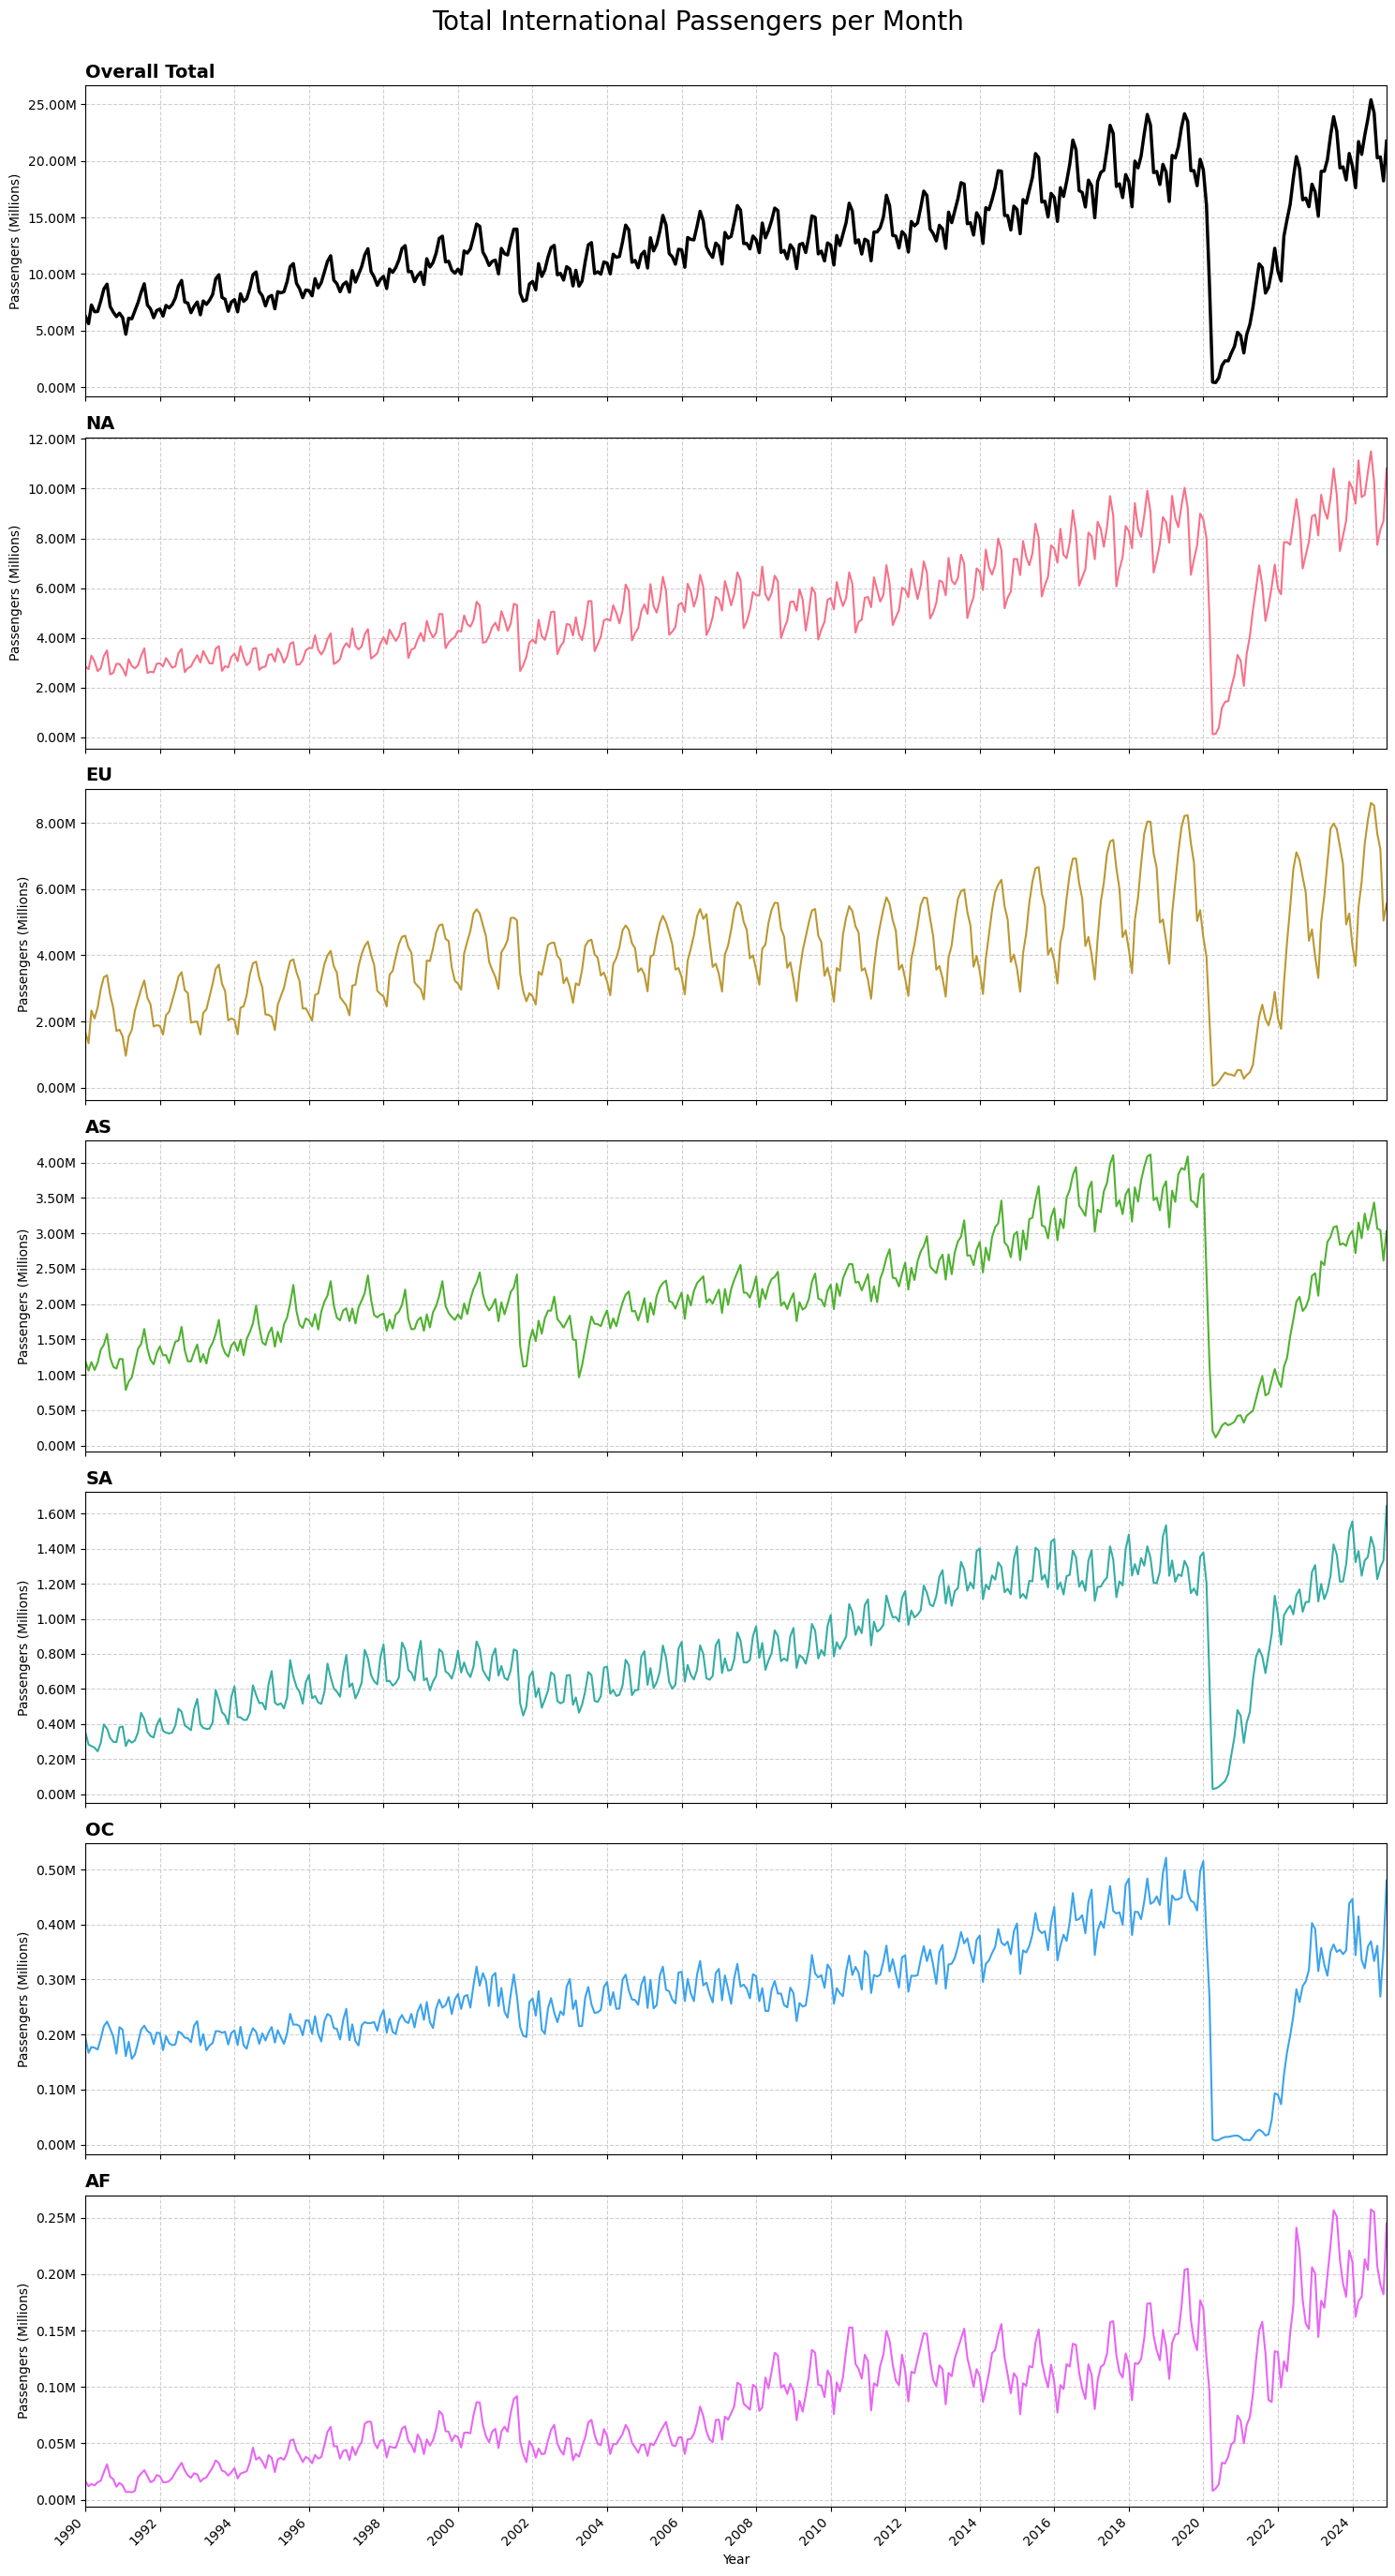

In [7]:
# Get overall totals by month
pax_total_month = df.groupby('data_dte')['total'].sum()

# Get totals by month and continent
pax_by_continent_month = df.groupby(['data_dte', 'fg_continent'])['total'].sum().reset_index()

# Get a sorted list of continents for plotting order
continents = pax_by_continent_month.groupby('fg_continent')['total'].sum().sort_values(ascending=False).index.tolist()
num_continents = len(continents)

# --- 2. Create the Subplots ---
# Create N+1 rows: one for the total and one for each continent
fig, axes = plt.subplots(
    num_continents + 1, 
    1, 
    figsize=(15, 4 * (num_continents + 1)), 
    sharex=True  # Share the x-axis for alignment
)
fig.suptitle('Total International Passengers per Month', fontsize=20, y=0.98)

# Define a color palette
palette = sns.color_palette("husl", num_continents)

# --- 3. Plot the Overall Total (Top Plot) ---
ax_total = axes[0]
sns.lineplot(data=pax_total_month, ax=ax_total, color='black', linewidth=2.5)
ax_total.set_title("Overall Total", loc='left', fontsize=14, fontweight='bold')

# --- 4. Loop Through Continents and Create Subplots ---
for i, continent in enumerate(continents):
    ax = axes[i + 1]
    continent_data = pax_by_continent_month[pax_by_continent_month['fg_continent'] == continent]
    
    # Plot the data for the current continent with a unique color
    sns.lineplot(data=continent_data, x='data_dte', y='total', ax=ax, color=palette[i])
    ax.set_title(continent, loc='left', fontsize=14, fontweight='bold')

# --- 5. Format All Axes ---
formatter = FuncFormatter(lambda y, pos: f'{y / 1_000_000:.2f}M')

for ax in axes:
    ax.yaxis.set_major_formatter(formatter)
    ax.set_ylabel('Passengers (Millions)')
    ax.set_xlabel(None)  # Remove individual x-labels to avoid clutter
    ax.grid(True, linestyle='--', alpha=0.6)

# --- 6. Final Touches ---
# Set shared x-axis properties on the last plot
last_ax = axes[-1]
last_ax.set_xlim(df['data_dte'].min(), df['data_dte'].max())
last_ax.xaxis.set_major_locator(plt.matplotlib.dates.YearLocator(2))
last_ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
last_ax.set_xlabel('Year')
plt.setp(last_ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust layout for suptitle
plt.savefig(results_output_path / 'figures' / 'total_passengers_per_month_per_continent.png', dpi=300)

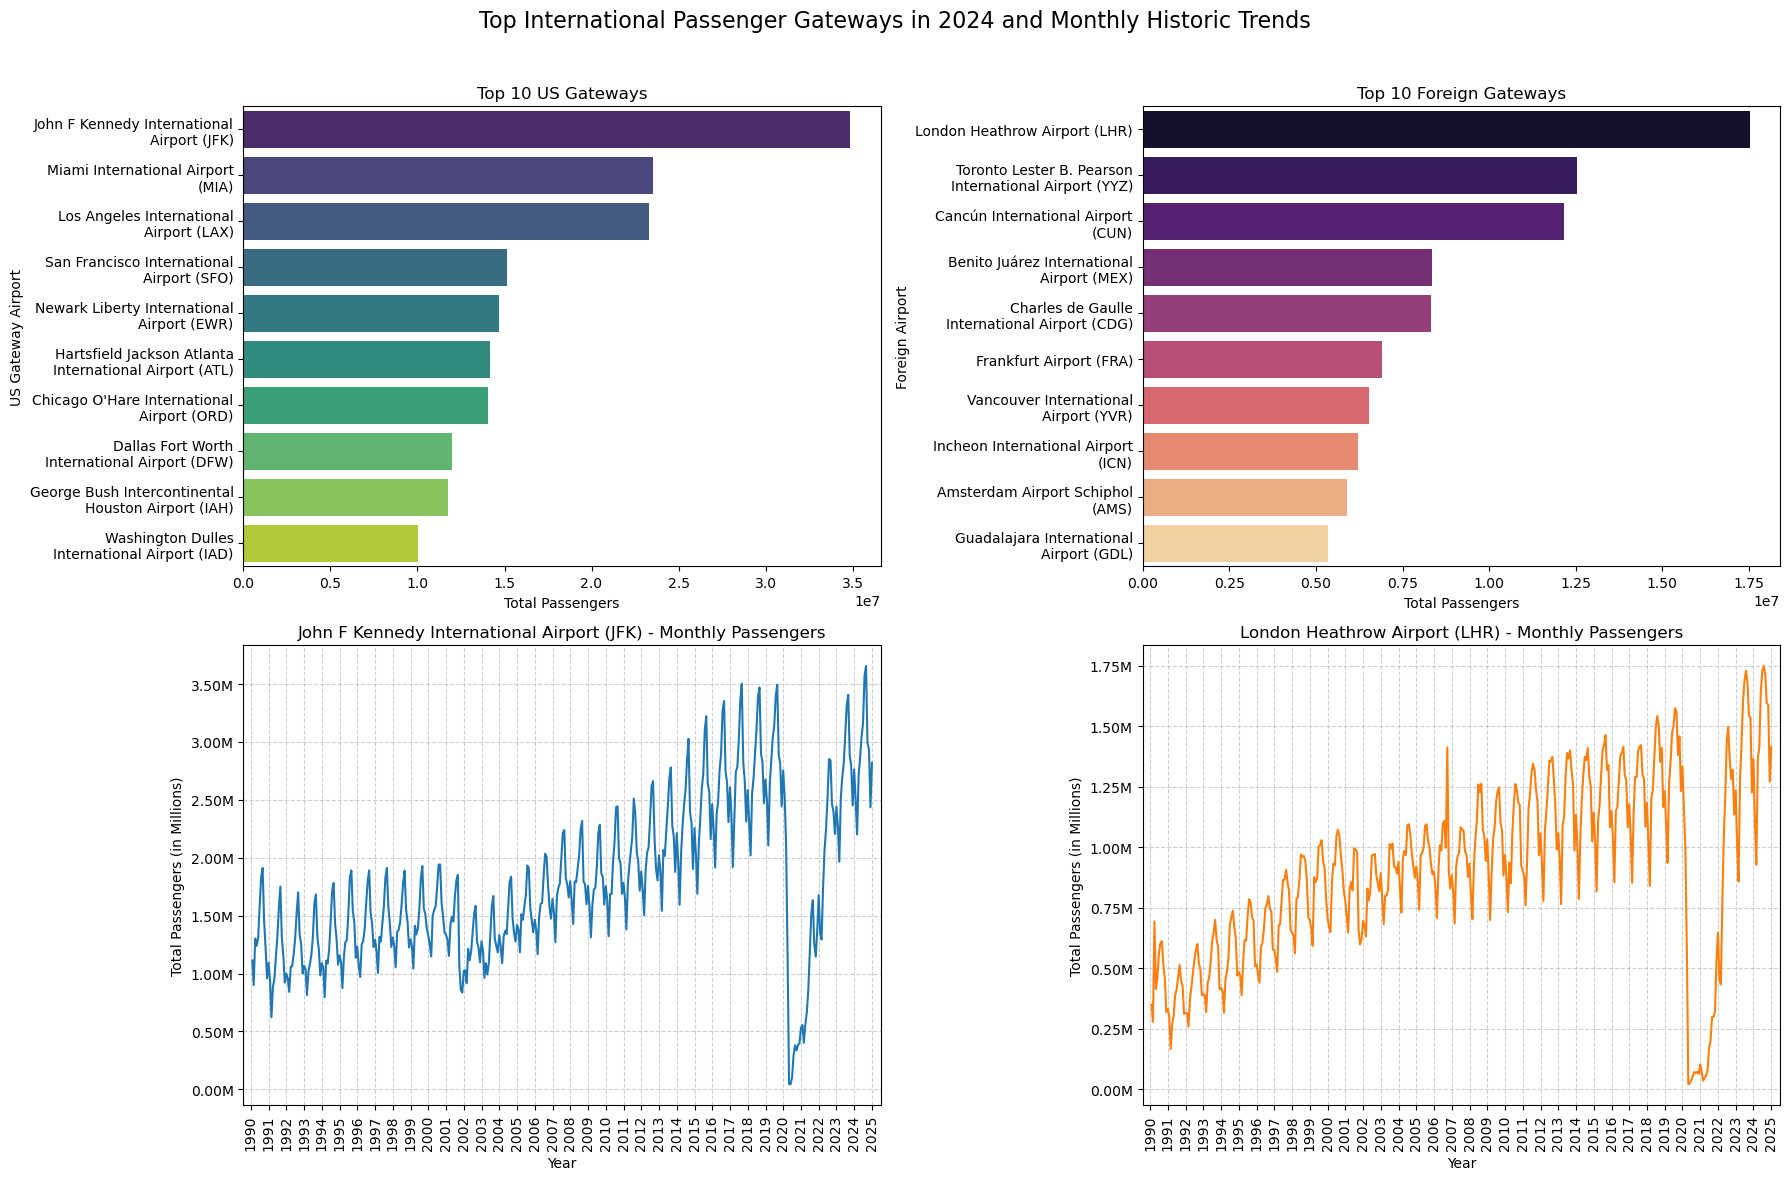

In [8]:
def plot_top_airports_barh(data, ax, palette, title, ylabel):
    """Creates a horizontal bar plot for top airports with wrapped labels."""
    
    # 1. Create your wrapped labels first
    wrapped_labels = [textwrap.fill(label, width=30) for label in data.index]
    
    # 2. Pass the pre-formatted labels directly to the 'y' parameter
    sns.barplot(
        x=data.values, 
        y=wrapped_labels,
        ax=ax, 
        palette=palette,
        hue=wrapped_labels,
        legend=False
    )
    ax.set_title(title)
    ax.set_xlabel('Total Passengers')
    ax.set_ylabel(ylabel)

def plot_airport_timeseries(df, airport_label_col, airport_name, ax, color):
    """Creates a time-series line plot for a single airport's monthly traffic."""
    df_month = df[df[airport_label_col] == airport_name].groupby(
        pd.Grouper(key='data_dte', freq='ME')
    )['total'].sum().reset_index()

    sns.lineplot(data=df_month, x='data_dte', y='total', ax=ax, color=color)
    
    # --- DYNAMIC X-AXIS LIMITS ---
    # Get the min and max dates from the data being plotted and set the limits.
    min_date = df_month['data_dte'].min()
    max_date = df_month['data_dte'].max()
    ax.set_xlim(min_date - pd.DateOffset(months=6), max_date + pd.DateOffset(months=6))
    
    # Format Y-axis to show millions
    formatter = FuncFormatter(lambda y, pos: f'{y / 1_000_000:.2f}M')
    ax.yaxis.set_major_formatter(formatter)
    
    # Set X-axis ticks to show the start of each year
    ax.xaxis.set_major_locator(plt.matplotlib.dates.YearLocator())
    ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
    
    ax.set_title(f'{airport_name} - Monthly Passengers')
    ax.set_xlabel('Year')
    ax.set_ylabel('Total Passengers (in Millions)')
    ax.grid(True, linestyle='--', alpha=0.6)
    plt.setp(ax.get_xticklabels(), rotation=90, ha='center')

# --- MAIN PLOTTING SCRIPT ---

# 1. Prepare the data
df_2024 = df[df.year == 2024]
top_usg = df_2024.groupby('usg_airport_label')['total'].sum().sort_values(ascending=False).head(10)
top_fg = df_2024.groupby('fg_airport_label')['total'].sum().sort_values(ascending=False).head(10)

# 2. Create the 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Top International Passenger Gateways in 2024 and Monthly Historic Trends', fontsize=16)

# 3. Call the plotting functions
plot_top_airports_barh(top_usg, axes[0, 0], 'viridis', 'Top 10 US Gateways', 'US Gateway Airport')
plot_top_airports_barh(top_fg, axes[0, 1], 'magma', 'Top 10 Foreign Gateways', 'Foreign Airport')

busiest_us_name = top_usg.index[0]
plot_airport_timeseries(df, 'usg_airport_label', busiest_us_name, axes[1, 0], 'tab:blue')

busiest_fg_name = top_fg.index[0]
plot_airport_timeseries(df, 'fg_airport_label', busiest_fg_name, axes[1, 1], 'tab:orange')

# 4. Final adjustments and display
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig(results_output_path / 'figures' / 'top_airports_and_trends.png', dpi=300)

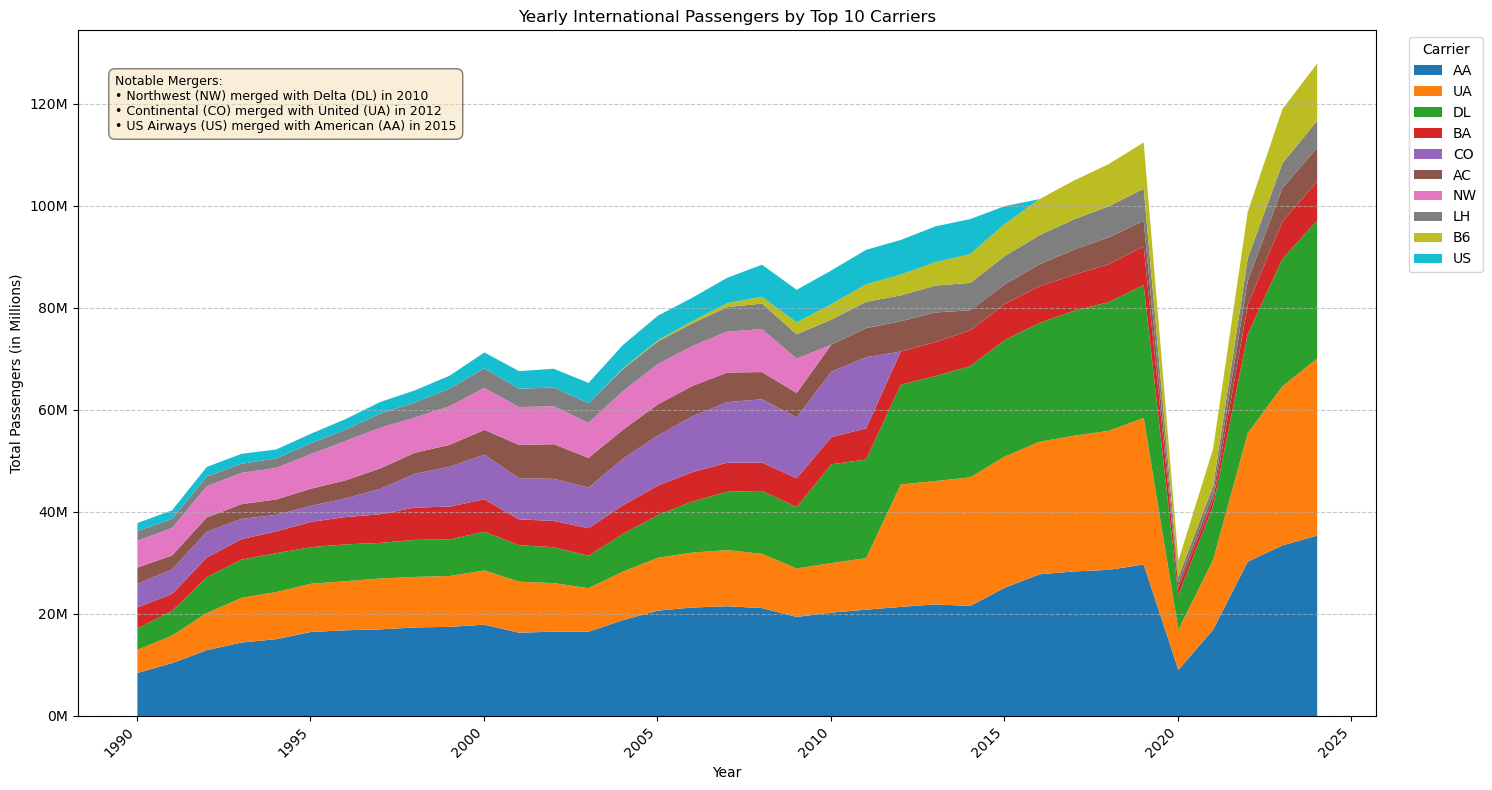

In [9]:
# --- Identify the Top 10 Carriers ---
# Find the top carriers based on total passengers over the entire period.
top_10_carriers = df.groupby('carrier')['total'].sum().sort_values(ascending=False).head(10).index.tolist()

# --- Prepare the Data for Plotting ---
# Filter the main DataFrame to include only the data for the top carriers.
df_top_carriers = df[df['carrier'].isin(top_10_carriers)].copy()

# Group by year and carrier to get the yearly data.
pax_by_carrier_year = df_top_carriers.groupby(['year', 'carrier'])['total'].sum().reset_index()

# Pivot the data to get carriers as columns. This is the key step for stacked bars.
df_pivoted = pax_by_carrier_year.pivot_table(
    index='year', 
    columns='carrier', 
    values='total', 
    fill_value=0
)

# Calculate the total passengers for each carrier over the entire period
carrier_totals = df_pivoted.sum().sort_values(ascending=False)

# Reorder the DataFrame columns based on this sorted list
df_pivoted_sorted = df_pivoted[carrier_totals.index]

# --- Create the Stacked Area Plot using the SORTED DataFrame ---
fig, ax = plt.subplots(figsize=(15, 8))

# Use the new df_pivoted_sorted DataFrame for plotting
df_pivoted_sorted.plot(
    kind='area', 
    stacked=True, 
    ax=ax,
    colormap='tab10',
    linewidth=0
)

# --- Format the Axes ---
# Format Y-axis to show millions
formatter = FuncFormatter(lambda y, pos: f'{y / 1_000_000:.0f}M')
ax.yaxis.set_major_formatter(formatter)

# --- Add Labels and Title ---
ax.set_title('Yearly International Passengers by Top 10 Carriers')
ax.set_xlabel('Year')
ax.set_ylabel('Total Passengers (in Millions)')
plt.xticks(rotation=45, ha='right')
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend(title='Carrier', bbox_to_anchor=(1.02, 1), loc='upper left')

merger_text = (
    'Notable Mergers:\n'
    '• Northwest (NW) merged with Delta (DL) in 2010\n'
    '• Continental (CO) merged with United (UA) in 2012\n'
    '• US Airways (US) merged with American (AA) in 2015'
)

# Place the text in the upper-left corner of the figure
plt.figtext(
    0.08, 0.9,
    merger_text,
    ha='left',
    va='top',
    fontsize=9,
    bbox={'boxstyle': 'round,pad=0.5', 'facecolor': 'wheat', 'alpha': 0.5}
)

plt.tight_layout()
plt.savefig(results_output_path / 'figures' / 'top_10_carriers_stacked_area.png', dpi=300)

--- Generating dashboard for NA ---


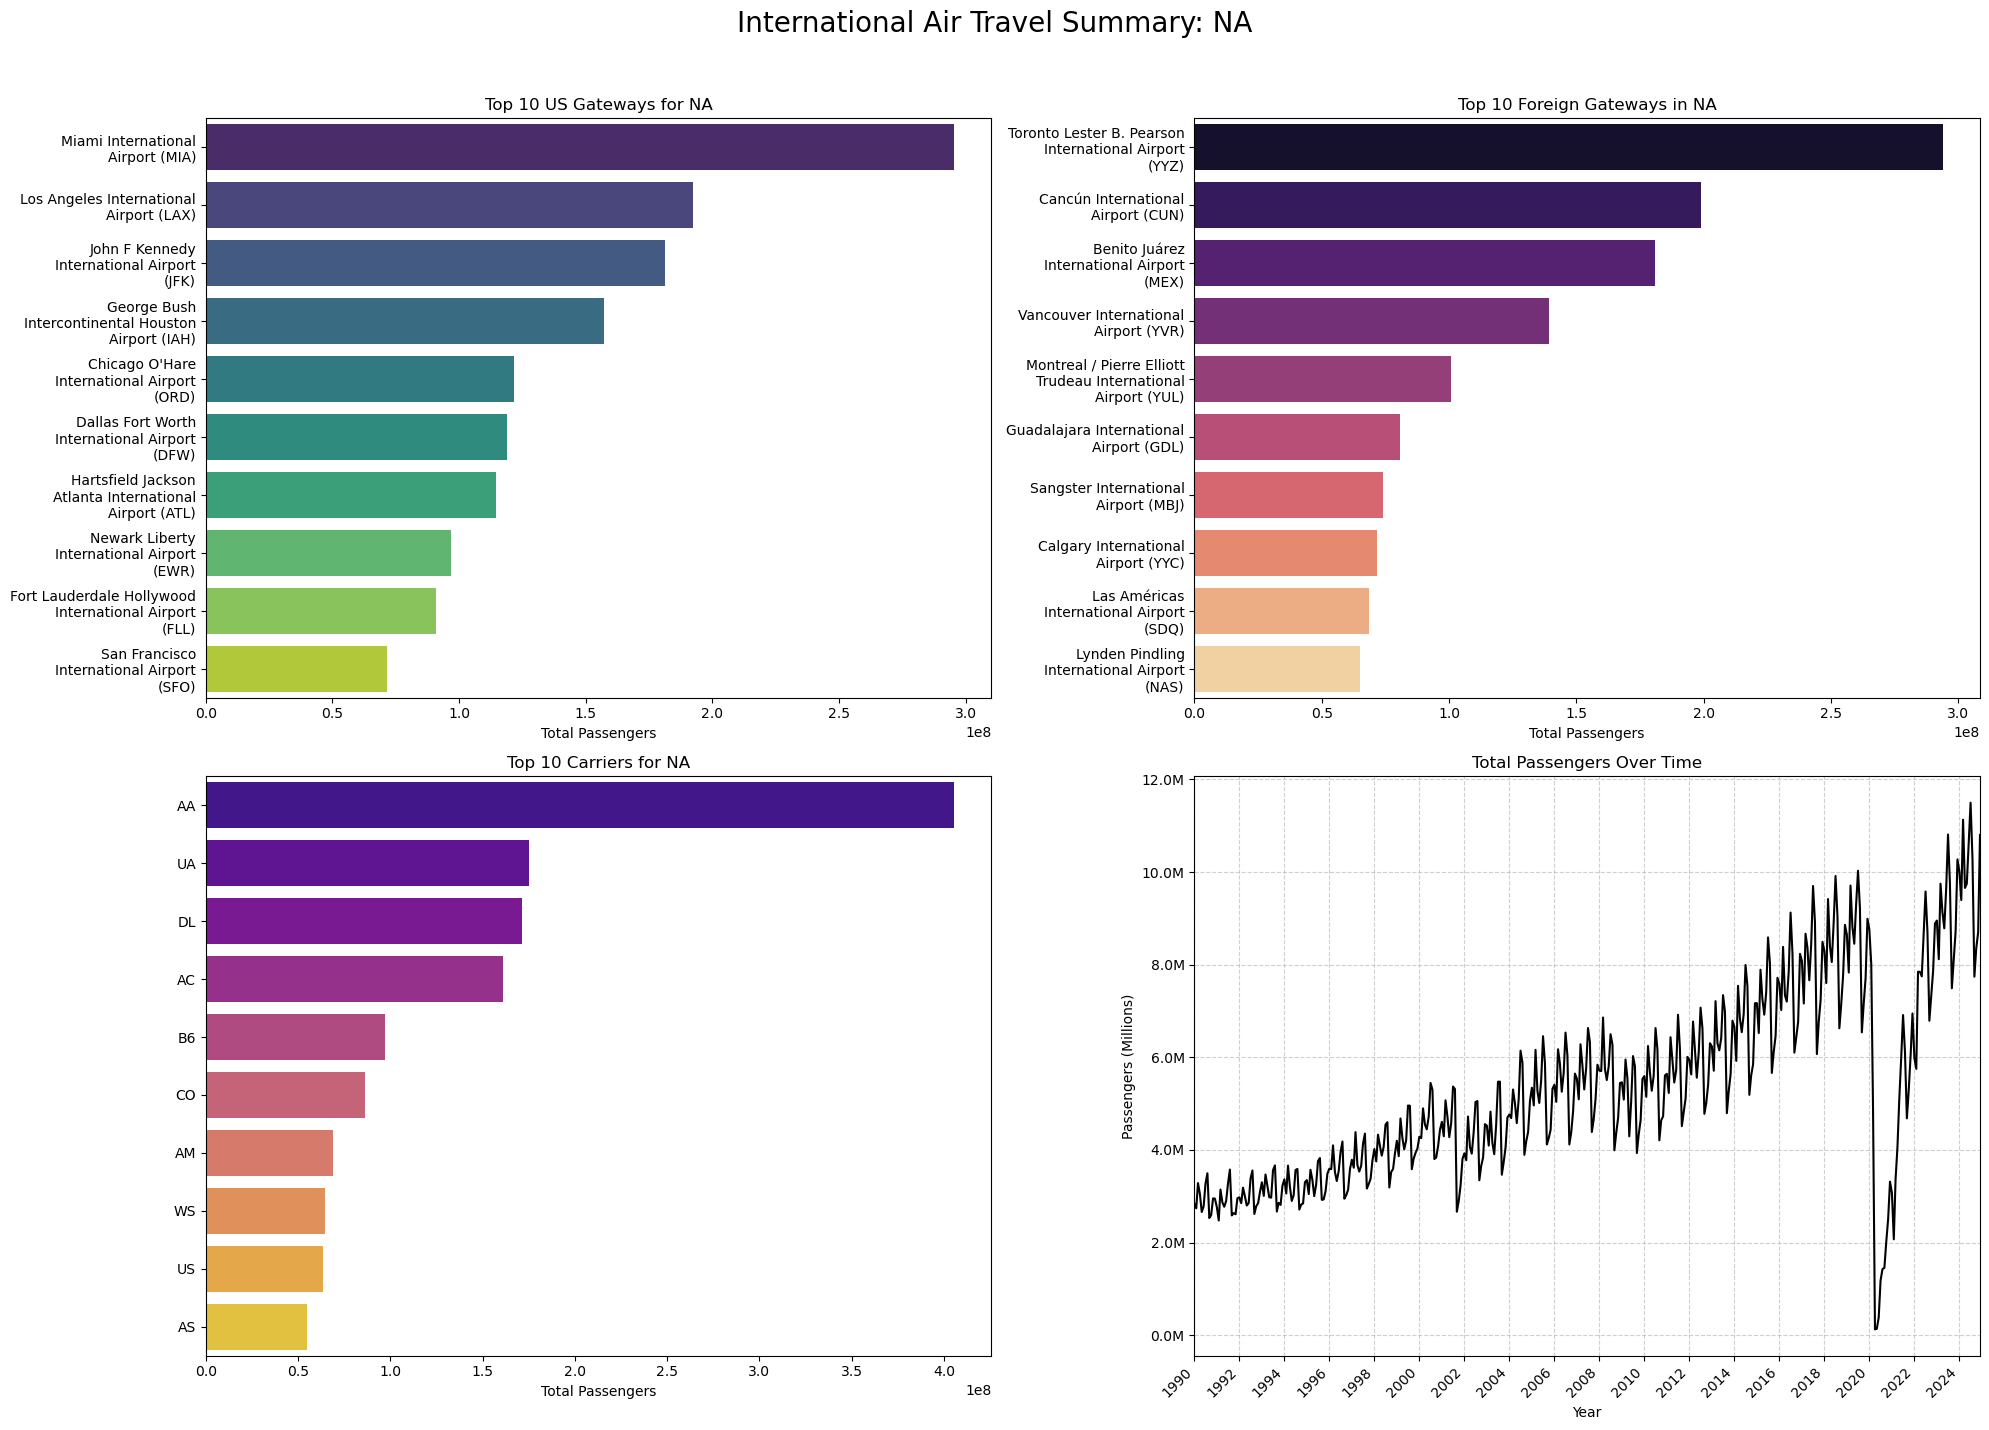

--- Generating dashboard for EU ---


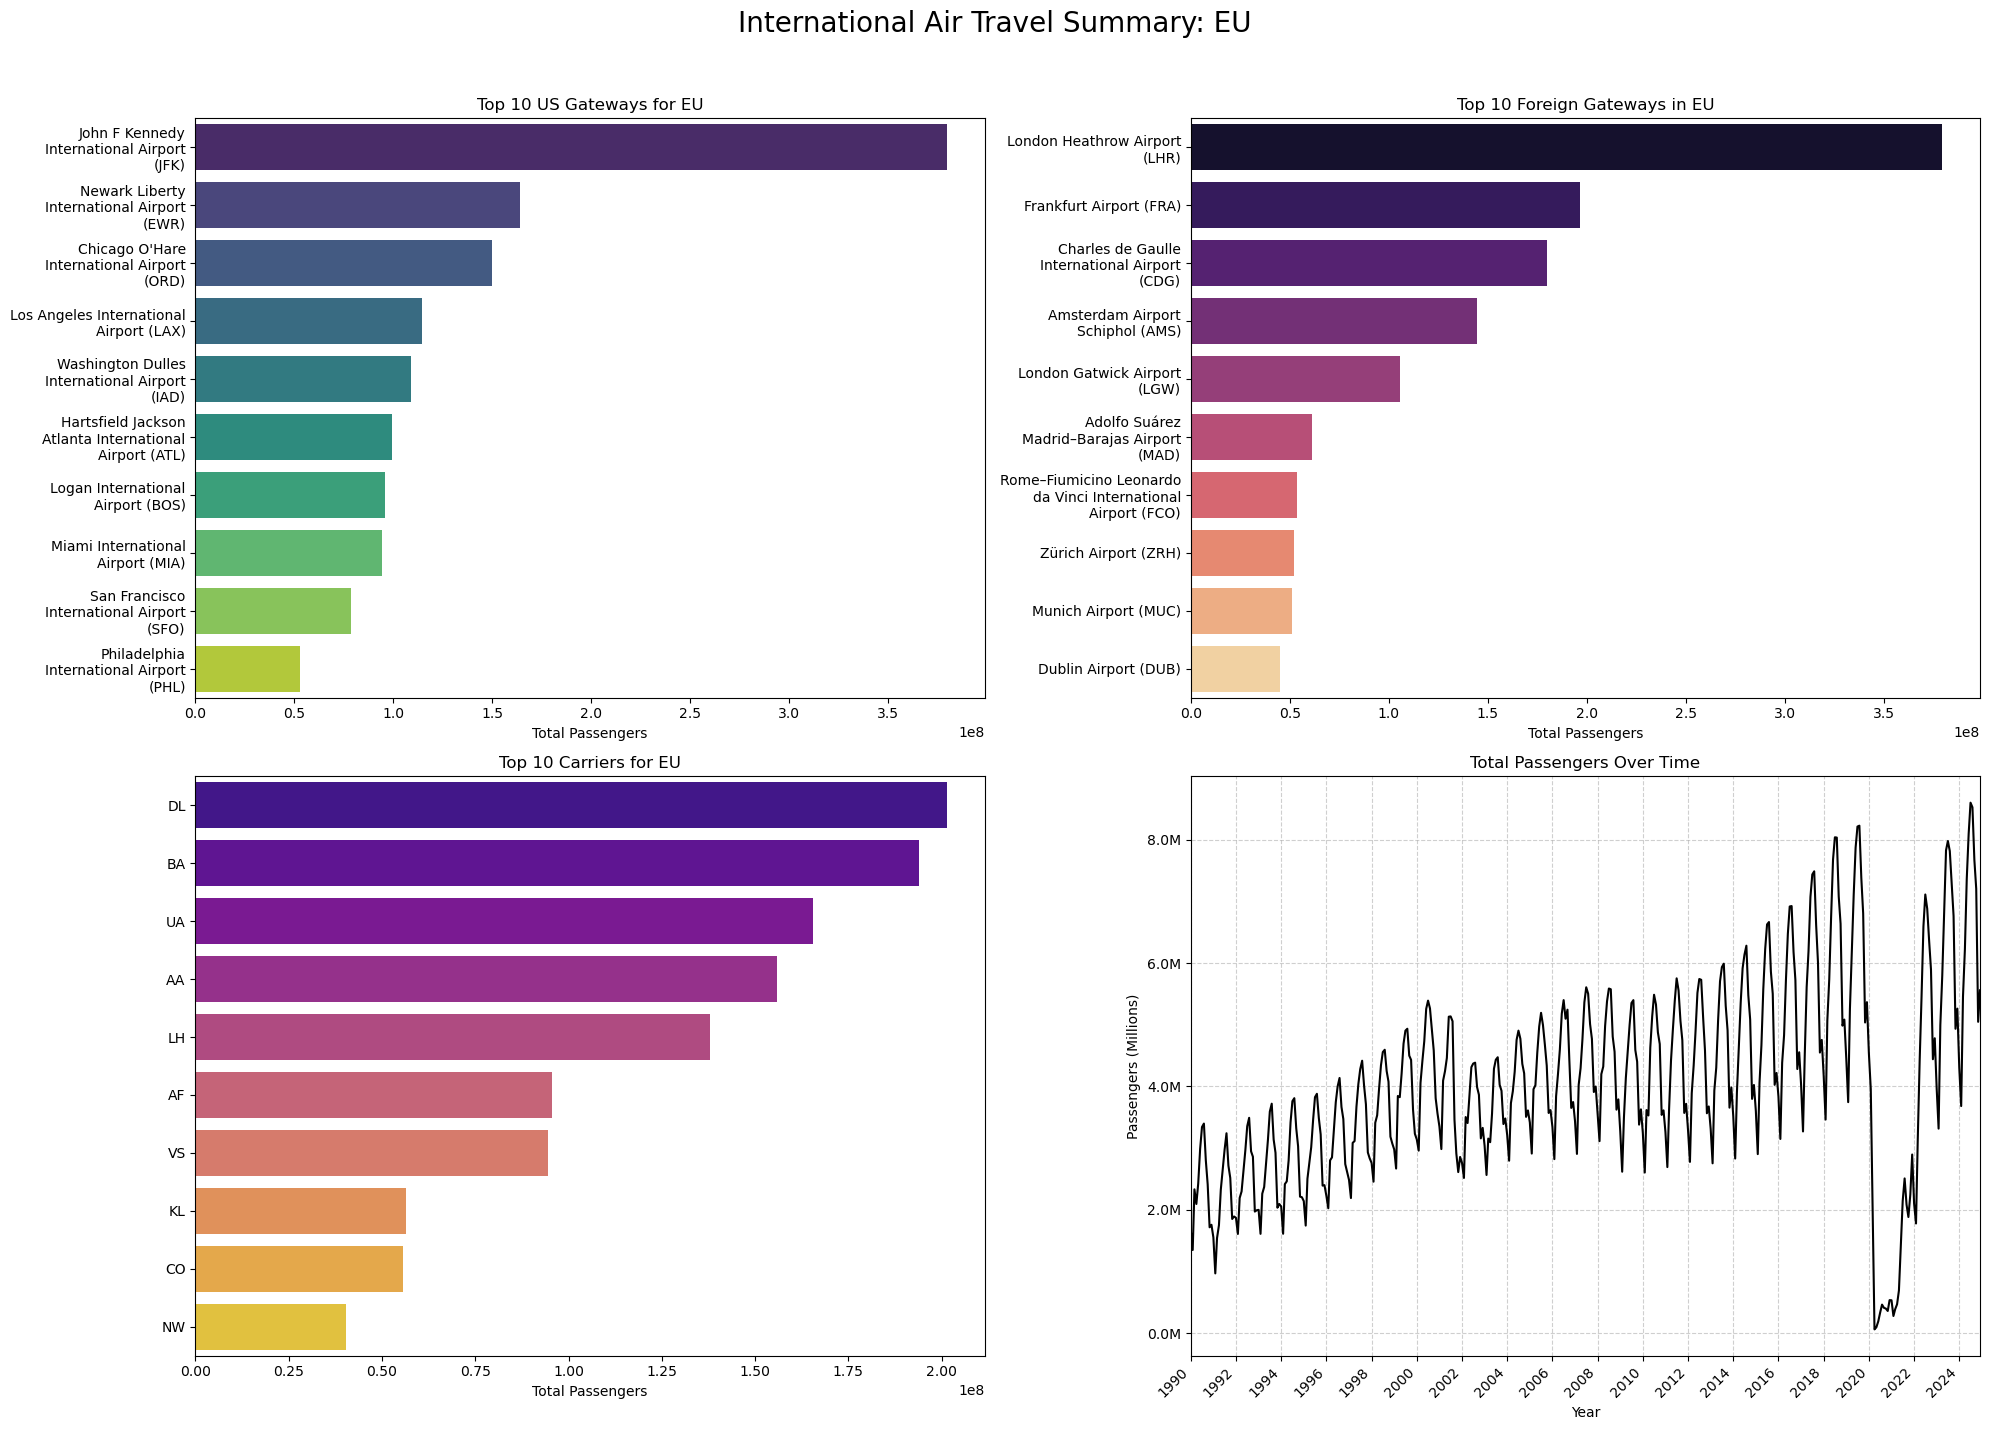

--- Generating dashboard for AS ---


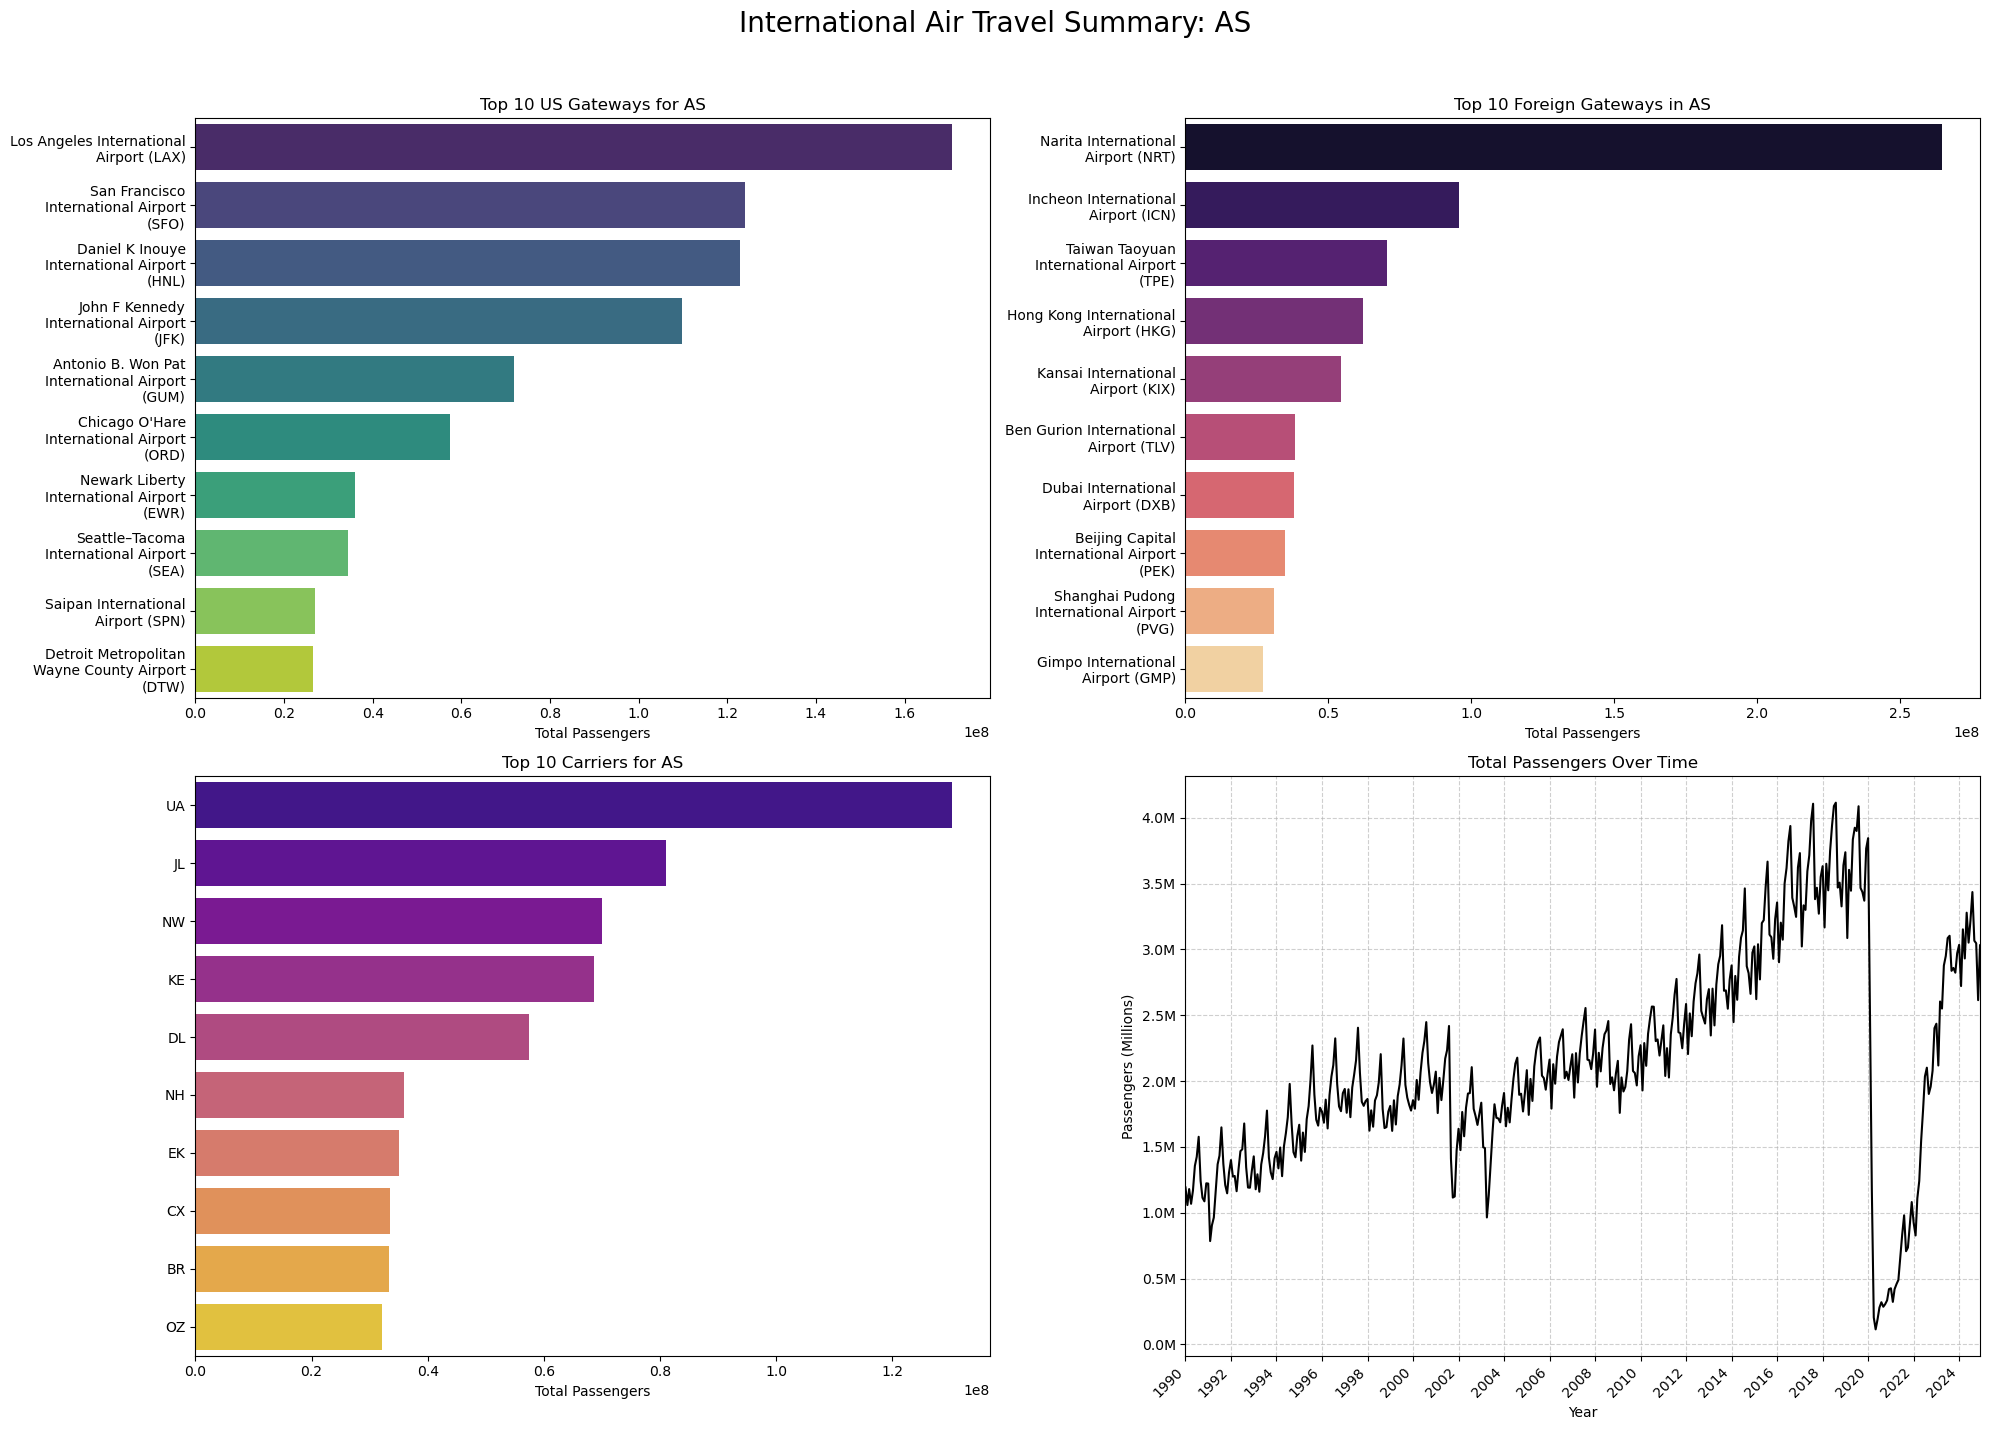

--- Generating dashboard for OC ---


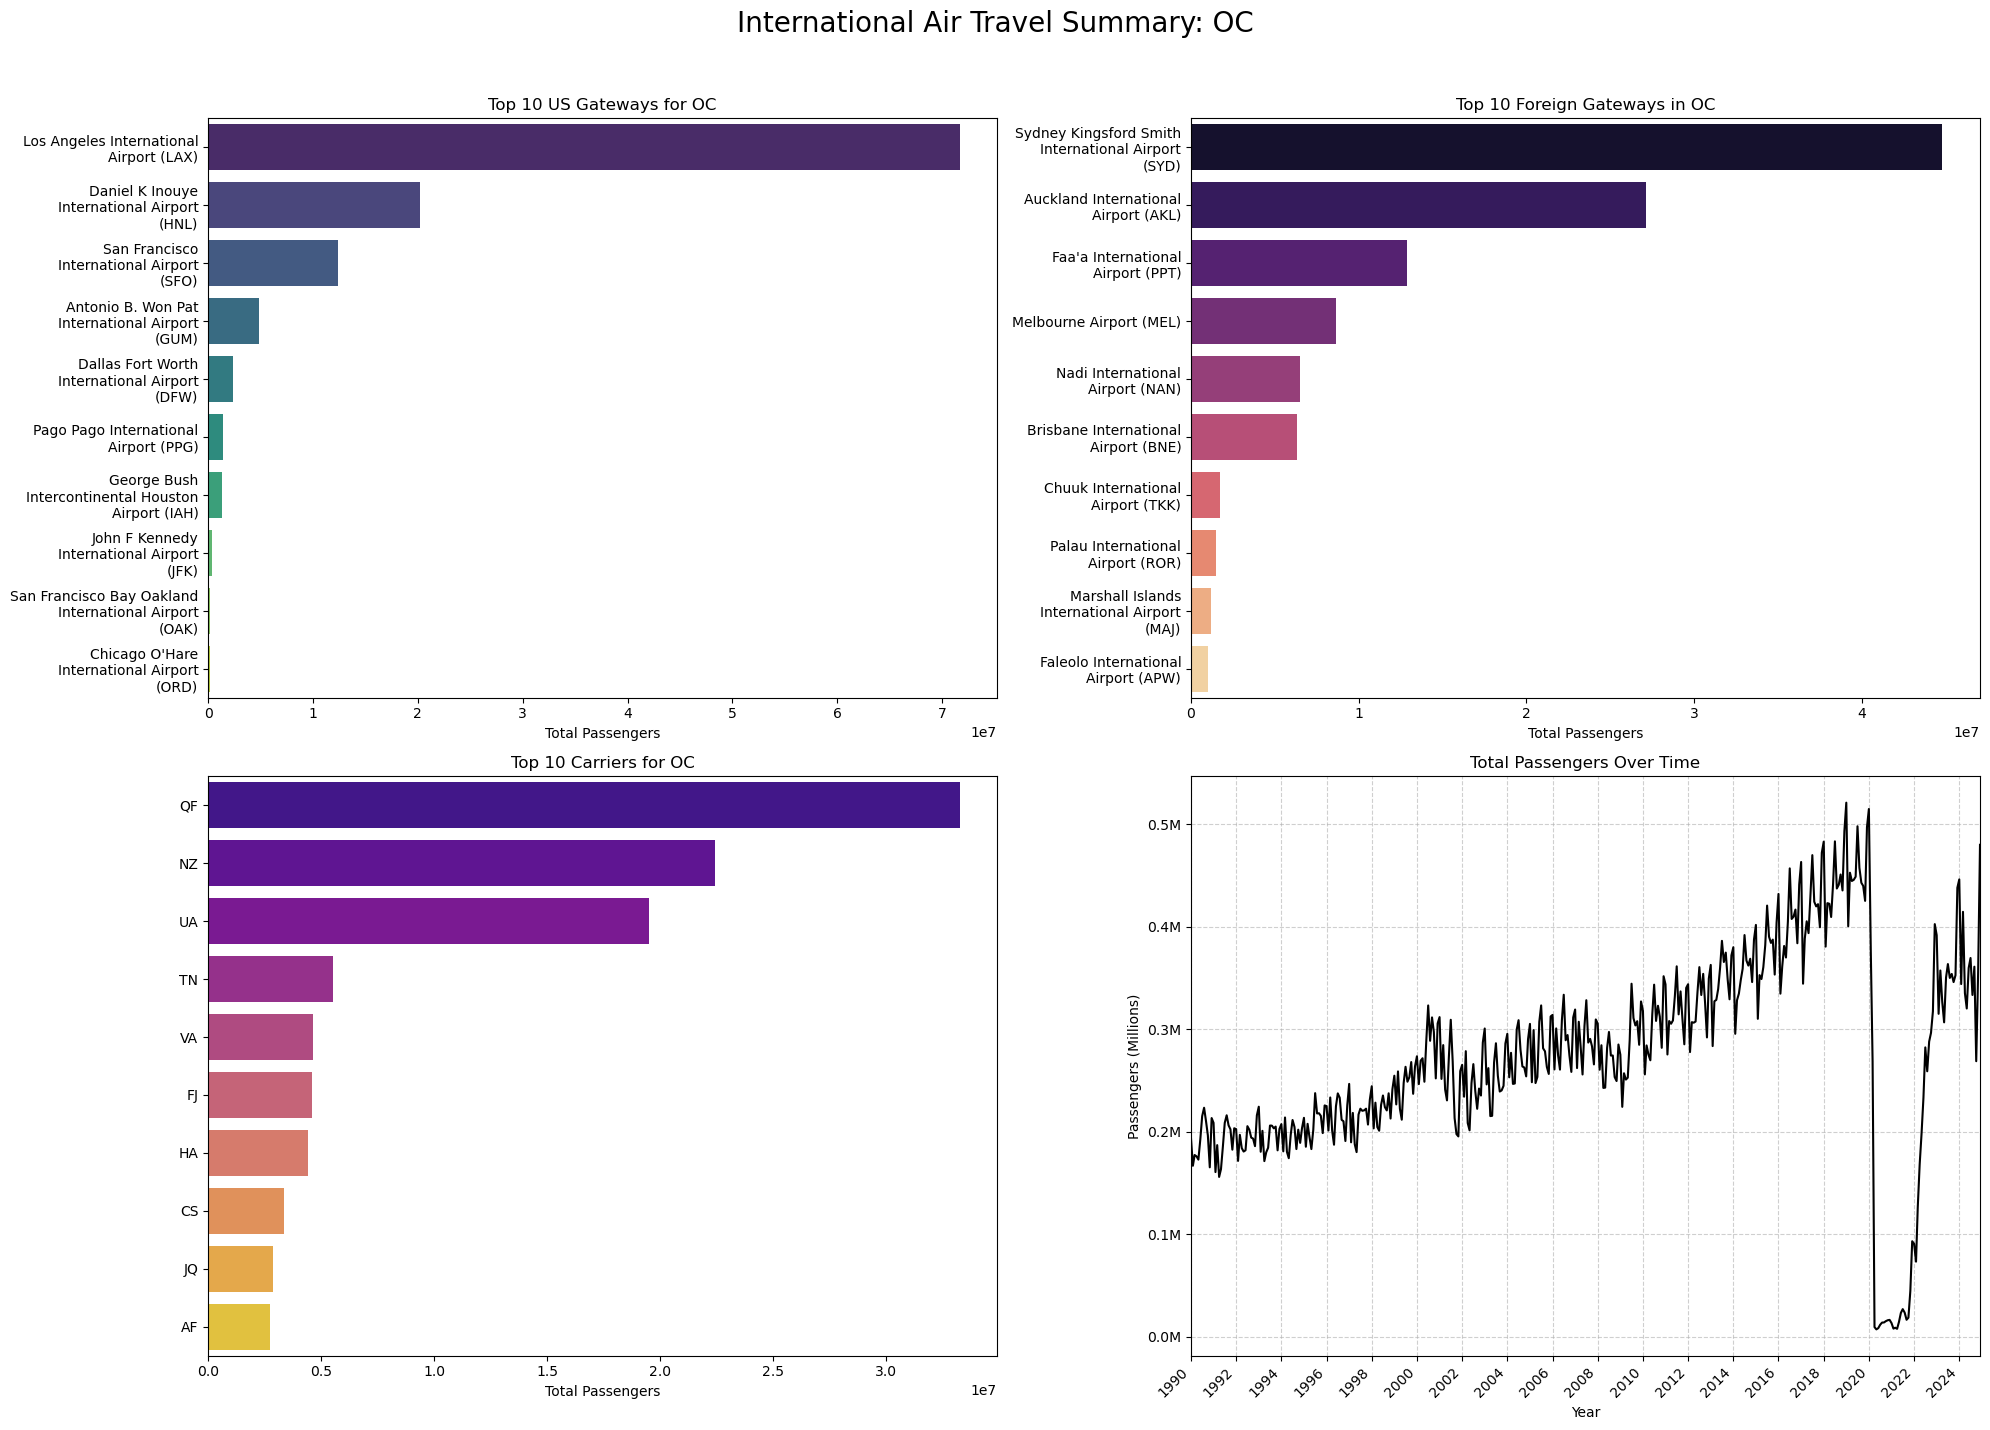

--- Generating dashboard for AF ---


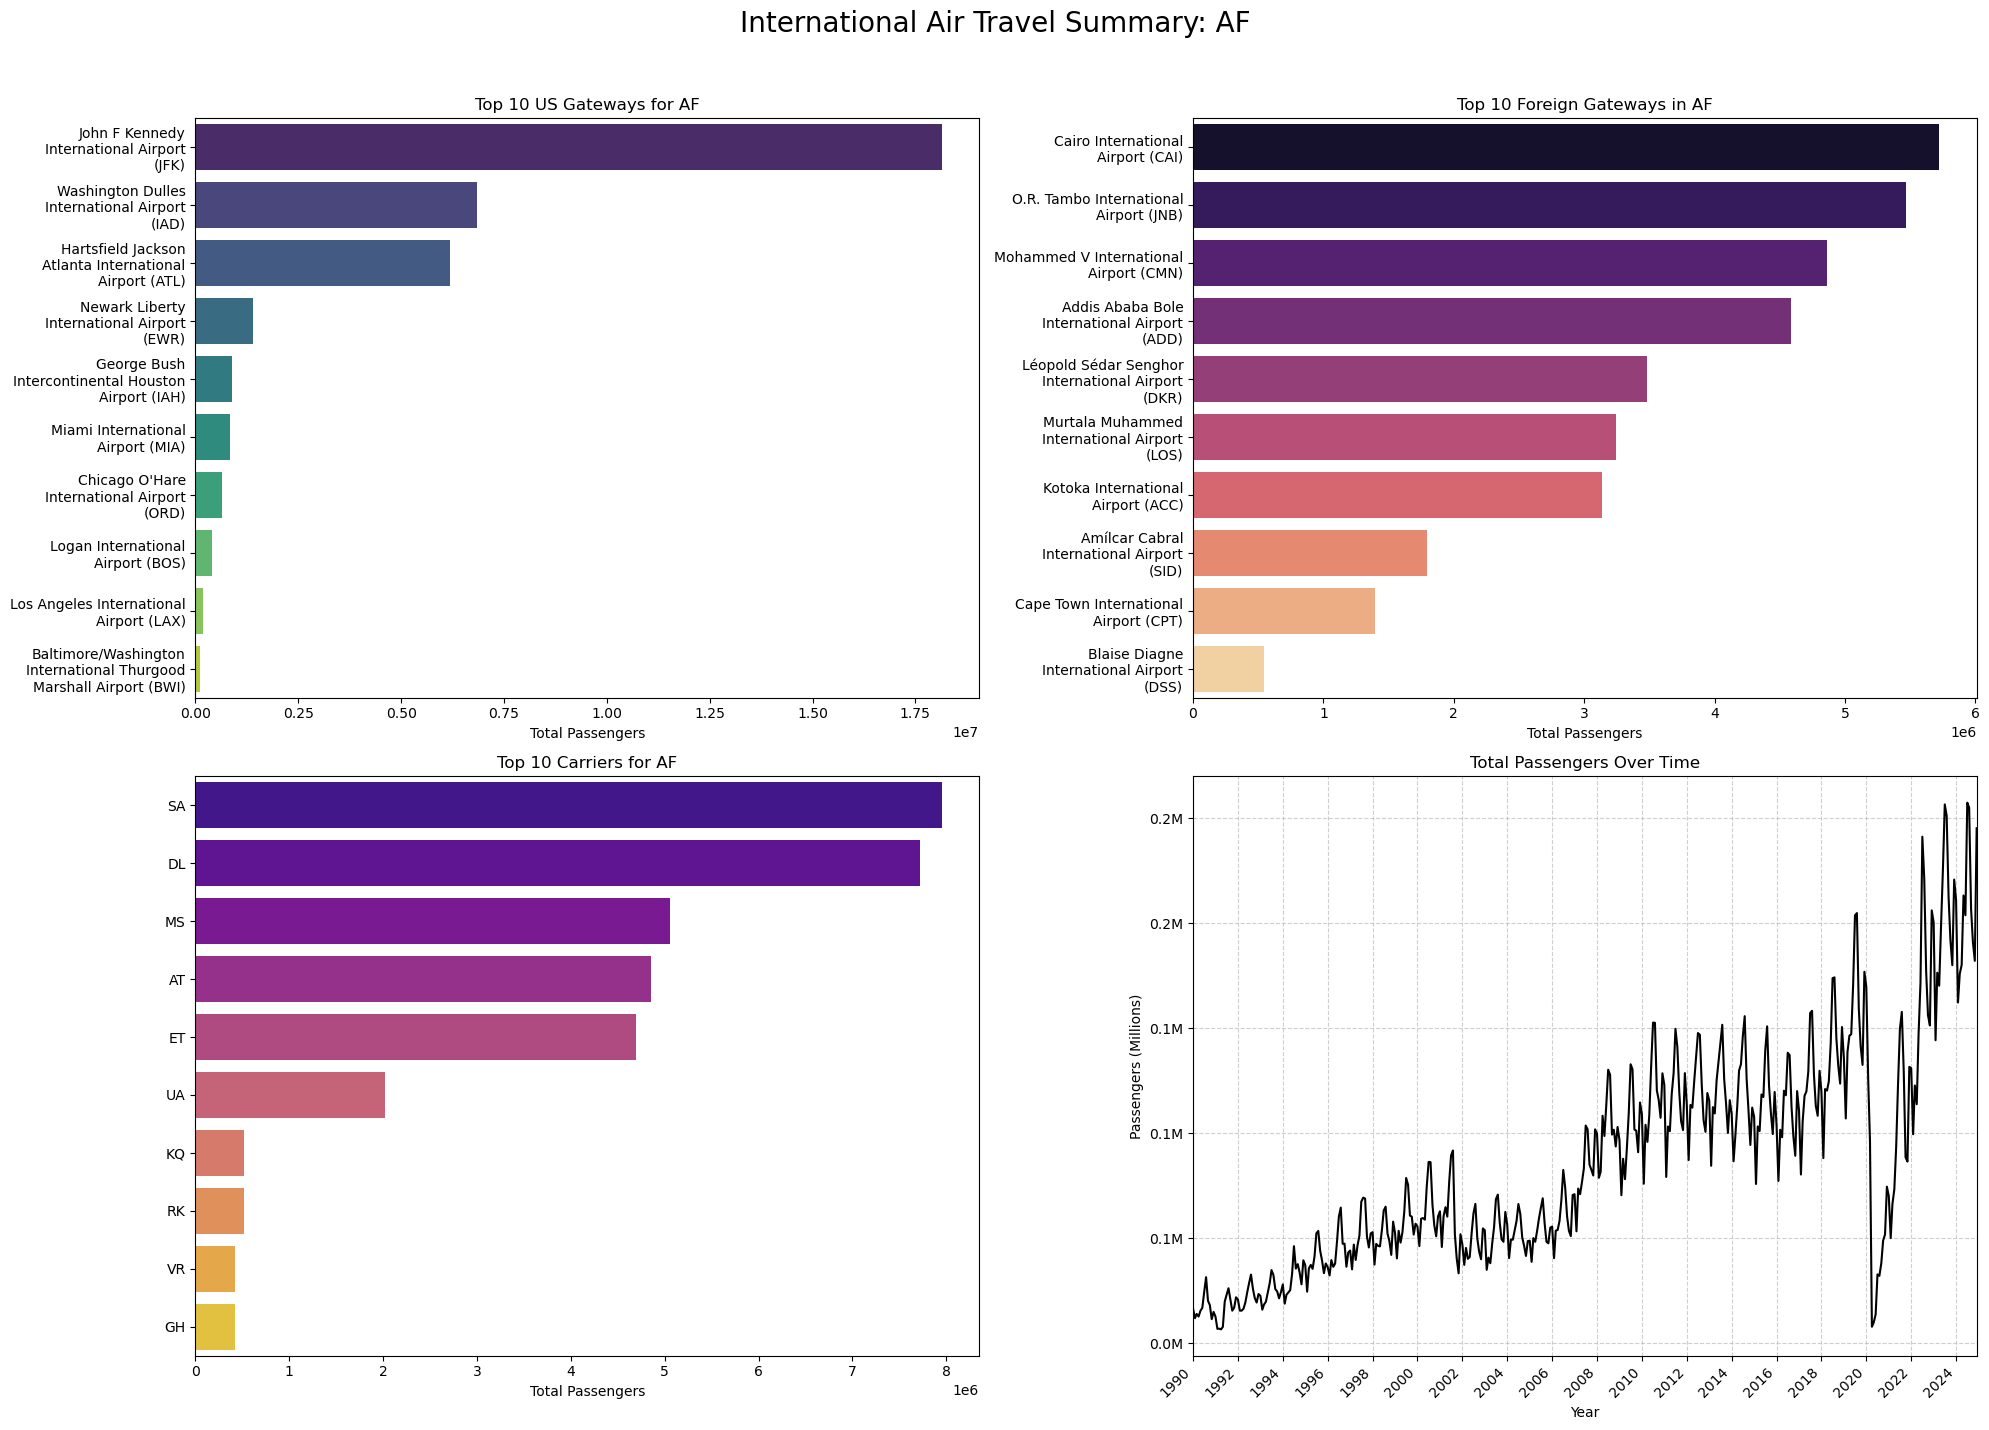

--- Generating dashboard for SA ---


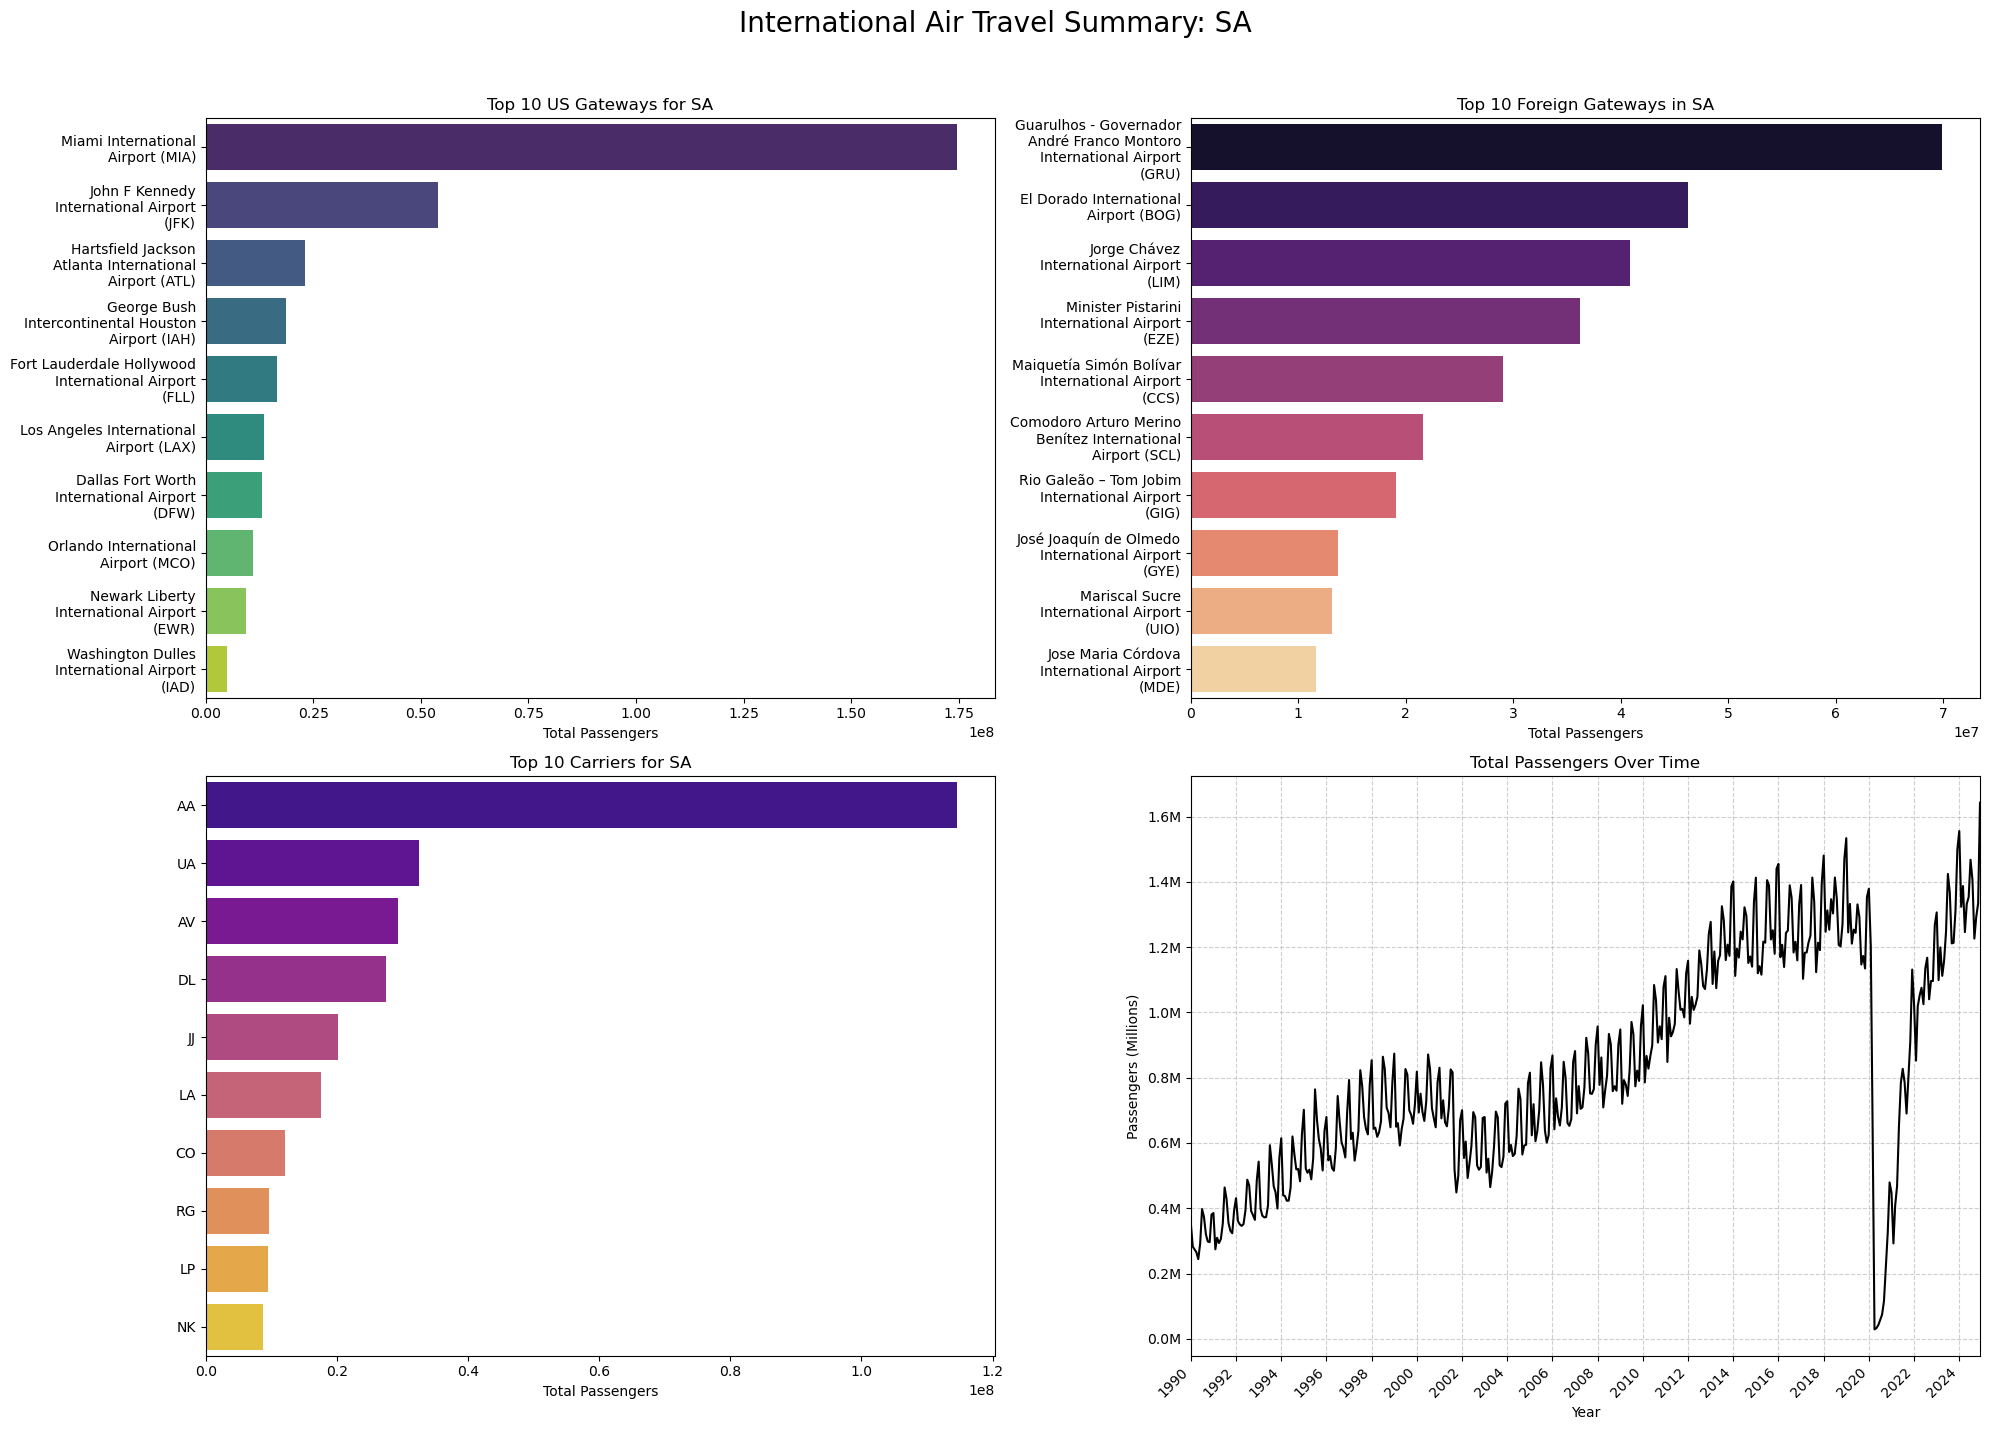


--- All continent dashboards have been generated. ---


In [10]:
def plot_top_horizontal_bar(data, ax, palette, title):
    """Creates a horizontal bar plot for top items with wrapped labels."""
    if data.empty:
        ax.text(0.5, 0.5, 'No Data Available', ha='center', va='center')
        ax.set_title(title)
        ax.set_xticks([])
        ax.set_yticks([])
        return
        
    wrapped_labels = [textwrap.fill(label, width=25) for label in data.index]
    sns.barplot(x=data.values, y=wrapped_labels, ax=ax, palette=palette, hue=wrapped_labels, legend=False)
    ax.set_title(title)
    ax.set_xlabel('Total Passengers')
    ax.set_ylabel(None)

def plot_total_passengers_timeseries(df_continent, ax, title):
    """Creates a time-series line plot for a continent's monthly passenger traffic."""
    pax_by_month = df_continent.groupby('data_dte')['total'].sum()
    sns.lineplot(data=pax_by_month, ax=ax, color='k')

    formatter = FuncFormatter(lambda y, pos: f'{y / 1_000_000:.1f}M')
    ax.yaxis.set_major_formatter(formatter)
    
    ax.set_xlim(df_continent['data_dte'].min(), df_continent['data_dte'].max())
    ax.xaxis.set_major_locator(plt.matplotlib.dates.YearLocator(2))
    ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
    
    ax.set_title(title)
    ax.set_xlabel('Year')
    ax.set_ylabel('Passengers (Millions)')
    ax.grid(True, linestyle='--', alpha=0.6)
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# --- MODIFIED DASHBOARD FUNCTION ---

def create_continent_dashboard(df_continent: pd.DataFrame, continent_name: str) -> plt.Figure:
    """
    Generates a 2x2 dashboard for a single continent and returns the figure object.
    """
    print(f"--- Generating dashboard for {continent_name} ---")
    
    # 1. Prepare data
    top_usg = df_continent.groupby('usg_airport_label')['total'].sum().sort_values(ascending=False).head(10)
    top_fg = df_continent.groupby('fg_airport_label')['total'].sum().sort_values(ascending=False).head(10)
    top_carriers = df_continent.groupby('carrier')['total'].sum().sort_values(ascending=False).head(10)

    # 2. Create the plot grid
    fig, axes = plt.subplots(2, 2, figsize=(20, 15))
    fig.suptitle(f'International Air Travel Summary: {continent_name}', fontsize=20)

    # 3. Populate the grid
    plot_top_horizontal_bar(top_usg, axes[0, 0], 'viridis', f'Top 10 US Gateways for {continent_name}')
    plot_top_horizontal_bar(top_fg, axes[0, 1], 'magma', f'Top 10 Foreign Gateways in {continent_name}')
    plot_top_horizontal_bar(top_carriers, axes[1, 0], 'plasma', f'Top 10 Carriers for {continent_name}')
    plot_total_passengers_timeseries(df_continent, axes[1, 1], 'Total Passengers Over Time')

    # 4. Adjust layout and return the figure object
    plt.tight_layout(rect=[0, 0.03, 1, 0.96])
    return fig

# Get a list of unique continents to loop through
continents = df['fg_continent'].dropna().unique()

# --- MODIFIED LOOP ---
for continent in continents:
    df_for_continent = df[df['fg_continent'] == continent]
    
    # 1. Call the function to get the figure object
    fig = create_continent_dashboard(df_for_continent, continent)
    
    # 2. Define the output path and save the figure from outside the function
    plt.savefig(results_output_path / 'figures' / f'dashboard_{continent}.png', dpi=300)
    plt.show()
    
    # 3. Close the figure to free up memory
    plt.close(fig)

print("\n--- All continent dashboards have been generated. ---")